# Introduction to Regression and Classification

## Linear Regression with scikit-learn - a simple Introduction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [ ]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [ ]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


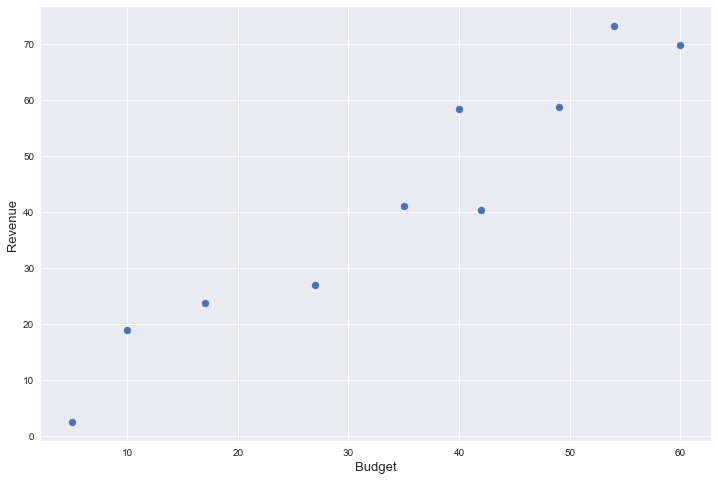

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

__Linear Relationship between Budget and Revenue__:

![image-2.png](attachment:image-2.png)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [ ]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

In [ ]:
df["pred"] = lm.predict(df.budget.to_frame())
df

In [ ]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [ ]:
y_lin

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Making Predictions with Linear Regression

__new movies (observations/data points)__

In [ ]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [ ]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [ ]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

In [ ]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

![image-3.png](attachment:image-3.png)

In [ ]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [ ]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

In [ ]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [ ]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome overfitting:

__Solutions__ to overcome overfitting: <br>
-use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
-more and better data (remove outliers & errors) <br>
-Constrain the model -> make the model more simple with __Regularization__

##  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [ ]:
mean = df.revenue.mean()
mean

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome underfitting:

__Solutions__ to overcome underfitting: <br>
-use a __more powerful model__ with more parameters<br>
-add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
-Reduce the constraints of the model -> make it more complex with __less Regularization__

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [ ]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [ ]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [ ]:
data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept= True)

In [ ]:
lm.fit(data.hours.to_frame(), data.success)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
data["pred"] = lm.predict(data.hours.to_frame())
data

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
data

In [ ]:
lm.fit(data.hours.to_frame(), data.success)

In [ ]:
data["pred"] = lm.predict(data.hours.to_frame())
data

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [ ]:
proba = lm.predict_proba(data.hours.to_frame())
proba

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()